In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
# Read data from .csv file
data = np.genfromtxt('./data/data_852.356_without_filter.csv', delimiter=',')

<IPython.core.display.Javascript object>


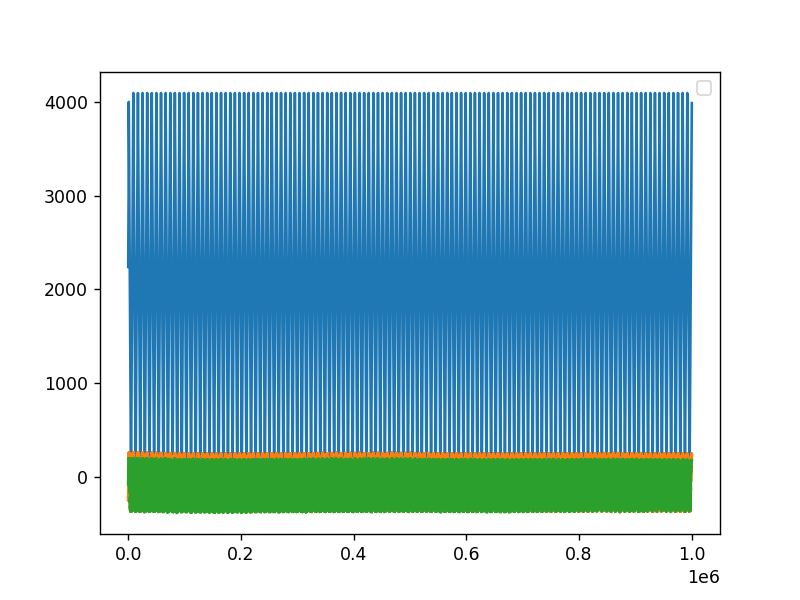

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [3]:
# Visulaize data

# 0th column -> ramp
# 1st column -> pd1
# 2nd column -> pd2

plt.close()
plt.plot(data[:,0])
plt.plot((data[:,1]-np.mean(data[:,1])))
plt.plot((data[:,2]-np.mean(data[:,2])))
plt.legend()
plt.show()

In [6]:
print(f'min: {np.min(data[:,1])}\nmax: {np.max(data[:,1])}')
print(f'min: {np.min(data[:,2])}\nmax: {np.max(data[:,2])}')
print(f'min: {np.min(data[:,1]-data[:,2])}\nmax: {np.max(data[:,1]-data[:,2])}')

min: 64.0
max: 705.0
min: 168.0
max: 753.0
min: -377.0
max: 194.0


In [12]:
# Normalization

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

data[:,1] = NormalizeData(data[:,1])
data[:,2] = NormalizeData(data[:,2])

<IPython.core.display.Javascript object>


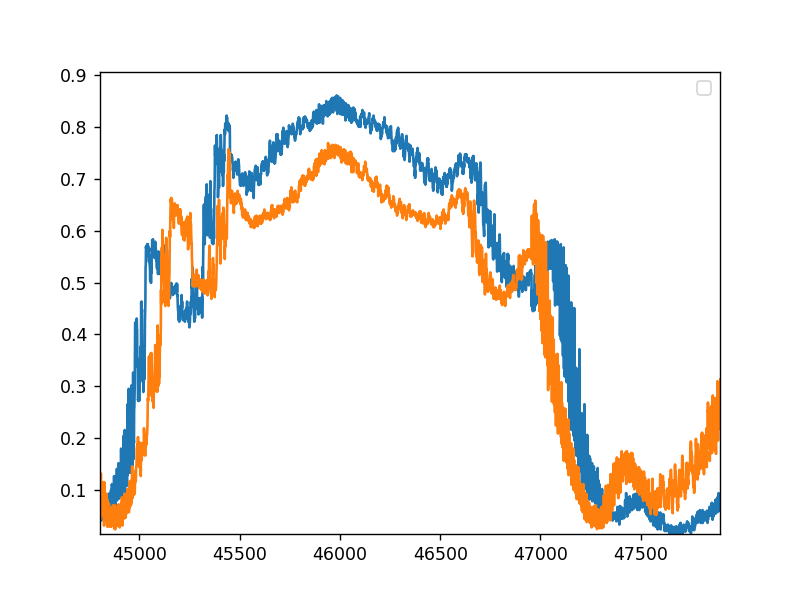

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [13]:
# Visulaize data

# 0th column -> ramp
# 1st column -> pd1
# 2nd column -> pd2

plt.close()
# plt.plot(data[:,0])
plt.plot((data[:,1]))
plt.plot((data[:,2]))
plt.legend()
plt.show()

In [14]:
# We will seperate the data of each ramp slope

In [15]:
# get out the indices of minimum and maximum position in ramp value
min_index = np.where(data[:,0] == np.min(data[:,0]))
max_index = np.where(data[:,0] == np.max(data[:,0]))

print(f'min_index length: {np.shape(min_index)[1]}\nmax_index length: {np.shape(max_index)[1]} \n')
print(f'Min_indices: {min_index},\nMax_indices:{max_index}')

min_index length: 122
max_index length: 121 

Min_indices: (array([  5019,  13209,  21399,  29589,  37779,  45969,  54159,  62349,
        70539,  78729,  86919,  95109, 103299, 111489, 119679, 127869,
       136059, 144249, 152439, 160629, 168819, 177009, 185199, 193389,
       201579, 209769, 217959, 226149, 234339, 242529, 250719, 258909,
       267099, 275289, 283479, 291669, 299859, 308049, 316239, 324429,
       332619, 340809, 348999, 357189, 365379, 373569, 381759, 389949,
       398139, 406329, 414519, 422709, 430899, 439089, 447279, 455469,
       463659, 471849, 480039, 488229, 496419, 504609, 512799, 520989,
       529179, 537369, 545559, 553749, 561939, 570129, 578319, 586509,
       594699, 602889, 611079, 619269, 627459, 635649, 643839, 652029,
       660219, 668409, 676599, 684789, 692979, 701169, 709359, 717549,
       725739, 733929, 742119, 750309, 758499, 766689, 774879, 783069,
       791259, 799449, 807639, 815829, 824019, 832209, 840399, 848589,
       856779, 86

In [16]:
# X is feature matrix X = {x_1^T, x_2^T, ...... , x_n^T}, where x_1 contains pd1 - pd2 value

pd1_0 = data[min_index[0][0]:max_index[0][0],1]
pd2_0 = data[min_index[0][0]:max_index[0][0],2]
pd_diff = pd1_0 - pd2_0

<IPython.core.display.Javascript object>


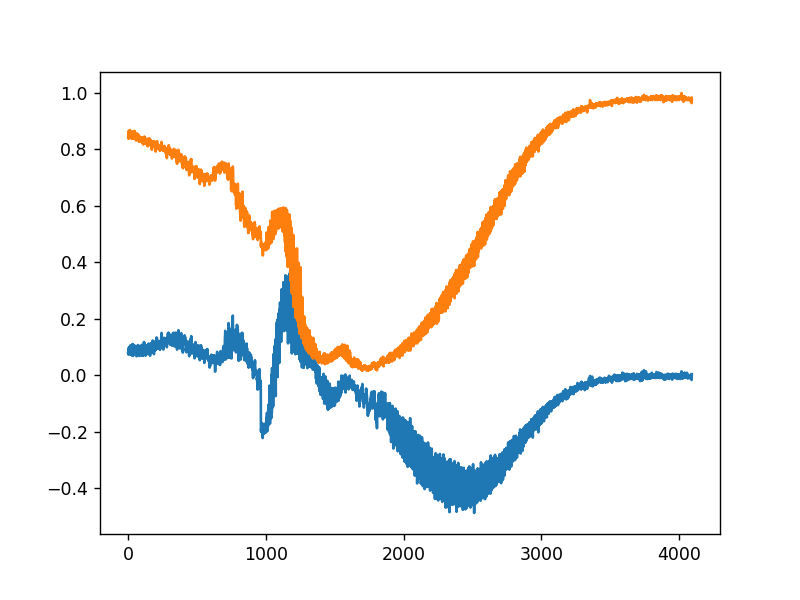

In [18]:
# Visulaize once
plt.close()
plt.plot(pd_diff)
plt.plot(pd1_0)
plt.show()

In [19]:
X = np.reshape(np.asarray(pd_diff), (1, len(pd_diff)))

for i in range(1, np.shape(max_index)[1]-1):
    pd1_0 = data[min_index[0][i]:max_index[0][i],1]
    pd2_0 = data[min_index[0][i]:max_index[0][i],2]
    pd_diff = pd1_0 - pd2_0
    X = np.vstack((X, np.reshape(np.asarray(pd_diff), (1, len(pd_diff)) ) ))

In [20]:
X.shape

(120, 4095)

In [21]:
np.savetxt("./data/X_852.356.csv", X, delimiter=",")